In [1]:
import pandas as pd
unclean=pd.read_csv('countypres_2000-2016.csv')

In [2]:
#cleaning up some of the data idk about (focusing only on parties)
print(unclean.head(3))
print(unclean.shape)
unclean.rename(columns = {'FIPS':'GEOID'}, inplace = True) 
unclean.drop(["version","candidate"], axis = 1, inplace = True)

   year    state state_po   county    FIPS     office       candidate  \
0  2000  Alabama       AL  Autauga  1001.0  President         Al Gore   
1  2000  Alabama       AL  Autauga  1001.0  President  George W. Bush   
2  2000  Alabama       AL  Autauga  1001.0  President     Ralph Nader   

        party  candidatevotes  totalvotes   version  
0    democrat          4942.0       17208  20191203  
1  republican         11993.0       17208  20191203  
2       green           160.0       17208  20191203  
(50524, 11)


In [3]:
#checking that the data is cleaner
print(unclean.head(2))
print(unclean.shape)

   year    state state_po   county   GEOID     office       party  \
0  2000  Alabama       AL  Autauga  1001.0  President    democrat   
1  2000  Alabama       AL  Autauga  1001.0  President  republican   

   candidatevotes  totalvotes  
0          4942.0       17208  
1         11993.0       17208  
(50524, 9)


In [4]:
#for now lets look at 2016
data2016=unclean[unclean['year'] >=2016].copy() #to specify that I am making a copy and not a "view"
data2016.drop('year',axis=1,inplace=True)
print(data2016.head(3))
#I want to specify that for 2016 third party candidate data has already been
#consolidated but that wont necessarily be the case for previous years.
#lets just check to be sure
data2016.party.unique()

         state state_po   county   GEOID     office       party  \
40517  Alabama       AL  Autauga  1001.0  President    democrat   
40518  Alabama       AL  Autauga  1001.0  President  republican   
40519  Alabama       AL  Autauga  1001.0  President         NaN   

       candidatevotes  totalvotes  
40517          5936.0       24973  
40518         18172.0       24973  
40519           865.0       24973  


array(['democrat', 'republican', nan], dtype=object)

In [5]:
#okay lets start looking at percentages
data2016['candidatevotes']=data2016['candidatevotes'].div(data2016['totalvotes'].values,axis=0)
print(data2016.head(3))
#now we want to use this data corresponding with color
#since the point of this is to show how counties actually are divided amongst votes (not all blue or all red)
#we will use the rgb color scheme (so dem==blue,rep==red,thirdparty==green)
#max for rgb colors for each is 255 so multiply the candidatevotes% by 255
#(that way if one county voted 100% green all would be green)
#data2016['candidatevotes'] = data2016['candidatevotes'].multiply(255) (if i can get it to be rbg then yes if not then)
#print(data2016.head(3)) #clearly I love checking with my eyes to see that it worked lol

         state state_po   county   GEOID     office       party  \
40517  Alabama       AL  Autauga  1001.0  President    democrat   
40518  Alabama       AL  Autauga  1001.0  President  republican   
40519  Alabama       AL  Autauga  1001.0  President         NaN   

       candidatevotes  totalvotes  
40517        0.237697       24973  
40518        0.727666       24973  
40519        0.034637       24973  


In [6]:
#having an empty NaN will be annoying, lets fix that for this
data2016['party'].fillna('third',inplace=True)
data2016.party.unique()
data2016.drop(['totalvotes','office','state_po','county'],axis=1,inplace=True)
print(data2016.head(6))

         state   GEOID       party  candidatevotes
40517  Alabama  1001.0    democrat        0.237697
40518  Alabama  1001.0  republican        0.727666
40519  Alabama  1001.0       third        0.034637
40520  Alabama  1003.0    democrat        0.193856
40521  Alabama  1003.0  republican        0.765457
40522  Alabama  1003.0       third        0.040687


In [8]:
gdv = pd.pivot_table(data2016, values='candidatevotes', index=['GEOID','state'], columns=['party'])
print(gdv)

party            democrat  republican     third
GEOID   state                                  
1001.0  Alabama  0.237697    0.727666  0.034637
1003.0  Alabama  0.193856    0.765457  0.040687
1005.0  Alabama  0.465278    0.520967  0.013755
1007.0  Alabama  0.212496    0.764032  0.023472
1009.0  Alabama  0.084258    0.893348  0.022393
...                   ...         ...       ...
56037.0 Wyoming  0.188616    0.709515  0.101868
56039.0 Wyoming  0.579235    0.310525  0.110240
56041.0 Wyoming  0.141913    0.726564  0.131523
56043.0 Wyoming  0.139486    0.763241  0.097273
56045.0 Wyoming  0.084799    0.860182  0.055020

[3154 rows x 3 columns]


In [9]:
gdv=gdv.reset_index().rename_axis(None, axis=1)
print(gdv)

        GEOID    state  democrat  republican     third
0      1001.0  Alabama  0.237697    0.727666  0.034637
1      1003.0  Alabama  0.193856    0.765457  0.040687
2      1005.0  Alabama  0.465278    0.520967  0.013755
3      1007.0  Alabama  0.212496    0.764032  0.023472
4      1009.0  Alabama  0.084258    0.893348  0.022393
...       ...      ...       ...         ...       ...
3149  56037.0  Wyoming  0.188616    0.709515  0.101868
3150  56039.0  Wyoming  0.579235    0.310525  0.110240
3151  56041.0  Wyoming  0.141913    0.726564  0.131523
3152  56043.0  Wyoming  0.139486    0.763241  0.097273
3153  56045.0  Wyoming  0.084799    0.860182  0.055020

[3154 rows x 5 columns]


In [10]:
#import matplotlib as plt 
#from matplotlib import cm, colors
gdv['republican']=pd.to_numeric(gdv['republican'])
gdv['third']=pd.to_numeric(gdv['third'])
gdv['democrat']=pd.to_numeric(gdv['democrat'])
gdv.head(10)
#print(gdf)
#gdv['Color']=plt.colors.to_hex([gdf['republican'],gdf['third'],gdf['democrat']],keep_alpha=False)

GEOID    state  democrat  republican     third
0  1001.0  Alabama  0.237697    0.727666  0.034637
1  1003.0  Alabama  0.193856    0.765457  0.040687
2  1005.0  Alabama  0.465278    0.520967  0.013755
3  1007.0  Alabama  0.212496    0.764032  0.023472
4  1009.0  Alabama  0.084258    0.893348  0.022393
5  1011.0  Alabama  0.749469    0.242038  0.008493
6  1013.0  Alabama  0.426706    0.561269  0.012025
7  1015.0  Alabama  0.276659    0.686633  0.036708
8  1017.0  Alabama  0.416115    0.564245  0.019640
9  1019.0  Alabama  0.144135    0.834156  0.021709

In [11]:
#okay so geoviews isn't giving me the image I want.... time to pivot
#first we're going to create a column called delta that is the difference in percentages of the # of votes
#that difference we will graph. We are going to make delta=dem-rep and ignore third party votes all together
#first lets change these to percentages
gdv['republican']=(100*gdv['republican'])
gdv['third']=(100*gdv['third'])
gdv['democrat']=(100*gdv['democrat'])
gdv.head(4)

GEOID    state   democrat  republican     third
0  1001.0  Alabama  23.769671   72.766588  3.463741
1  1003.0  Alabama  19.385601   76.545712  4.068687
2  1005.0  Alabama  46.527844   52.096666  1.375490
3  1007.0  Alabama  21.249575   76.403220  2.347205

In [12]:
#now lets make out variable delta
gdv['delta'] = gdv['democrat'] - gdv['republican']
gdv.head(4)

GEOID    state   democrat  republican     third      delta
0  1001.0  Alabama  23.769671   72.766588  3.463741 -48.996917
1  1003.0  Alabama  19.385601   76.545712  4.068687 -57.160111
2  1005.0  Alabama  46.527844   52.096666  1.375490  -5.568822
3  1007.0  Alabama  21.249575   76.403220  2.347205 -55.153646

In [13]:
#im confusing myself with the names...
gdv.drop(["democrat", "republican", "third"], axis=1,inplace=True)
gdv.head()

GEOID    state      delta
0  1001.0  Alabama -48.996917
1  1003.0  Alabama -57.160111
2  1005.0  Alabama  -5.568822
3  1007.0  Alabama -55.153646
4  1009.0  Alabama -80.909020

In [14]:
gdv.to_csv('out2.csv',index=False)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
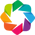

In [16]:
#lets start the map...
import geopandas as gpd
import geoviews as gv
gv.extension('bokeh')

In [17]:
geometries1 = gpd.read_file('cb_2016_us_county_20m')

In [18]:
geometries1.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      39      131  01074078  0500000US39131  39131        Pike   06   
1      46      003  01266983  0500000US46003  46003      Aurora   06   
2      55      035  01581077  0500000US55035  55035  Eau Claire   06   
3      72      145  01804553  0500000US72145  72145   Vega Baja   13   
4      48      259  01383915  0500000US48259  48259     Kendall   06   

        ALAND    AWATER                                           geometry  
0  1140324458   9567612  POLYGON ((-83.35353 39.19758, -82.78589 39.168...  
1  1834813753  11201379  POLYGON ((-98.80777 43.93522, -98.33151 43.937...  
2  1652211310  18848512  POLYGON ((-91.65045 44.85595, -90.92225 44.857...  
3   118766803  57805868  POLYGON ((-66.44899 18.38721, -66.43895 18.481...  
4  1715747531   1496797  POLYGON ((-98.92015 30.13829, -98.58790 30.138...

In [19]:
data=gdv.copy() #im changing some things so lets save our og thing
data['GEOID']=data['GEOID'].astype(int)
geometries1['GEOID']=geometries1['GEOID'].astype(int)
maps = gpd.GeoDataFrame(pd.merge(geometries1, data))

In [20]:
maps.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      39      131  01074078  0500000US39131  39131        Pike   06   
1      46      003  01266983  0500000US46003  46003      Aurora   06   
2      55      035  01581077  0500000US55035  55035  Eau Claire   06   
3      48      259  01383915  0500000US48259  48259     Kendall   06   
4      40      015  01101795  0500000US40015  40015       Caddo   06   

        ALAND    AWATER                                           geometry  \
0  1140324458   9567612  POLYGON ((-83.35353 39.19758, -82.78589 39.168...   
1  1834813753  11201379  POLYGON ((-98.80777 43.93522, -98.33151 43.937...   
2  1652211310  18848512  POLYGON ((-91.65045 44.85595, -90.92225 44.857...   
3  1715747531   1496797  POLYGON ((-98.92015 30.13829, -98.58790 30.138...   
4  3310745124  30820525  POLYGON ((-98.62315 35.55160, -98.31325 35.551...   

          state      delta  
0          Ohio -36.728681  
1  South Dakota -45.060412  
2     Wisconsin   7.256992  
3         Texas -59.925447  
4      Oklahoma -43.453145

In [21]:
#plot_opts = dict(tools=['hover'], cmap ='RdBu', color_index='delta',
              #   colorbar=True, xaxis=None, yaxis=None)
#gv.Polygons(maps, vdims=['delta'], label='2016 Map Plot').opts(plot=plot_opts)
gv.Polygons(maps, vdims=['state','NAME','delta'], label='2016 Map Plot').opts(color_index='delta', cmap='RdBu',colorbar=True, tools=['hover'])

:Polygons   [Longitude,Latitude]   (state,NAME,delta)

In [22]:
renderer = gv.renderer('bokeh')

In [26]:
g_map=gv.Polygons(maps, vdims=['state','NAME','delta'], label='2016 Map Plot').opts(color_index='delta', cmap='RdBu',colorbar=True, tools=['hover'])

In [27]:
renderer.save(g_map, 'g_map2')

In [29]:
final2=tiles*gv.Polygons(maps, vdims=['state','NAME','delta'], label='2016 Map Plot').opts(color_index='delta', cmap='RdBu',colorbar=True, tools=['hover'])
final2

:Overlay
   .WMTS.I                   :WMTS   [Longitude,Latitude]
   .Polygons.A_2016_Map_Plot :Polygons   [Longitude,Latitude]   (state,NAME,delta)

In [30]:
renderer.save(final2, '2016_pres_election_map_of_counties_final')